### **Step 1: import Necessary Libraries**

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

### **Step 2: Import and inspect the dataset**

In [136]:
# load the dataset
data = load_breast_cancer()

# convert into dataframe
df = pd.DataFrame(data.data, columns = data.feature_names)

#Add the target column
df['diagnosis'] = data.target

print('Show first 5 rows')
df.head()

Show first 5 rows


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [137]:
print("Check info - null value and datatype of the dataset")
df.info()

Check info - null value and datatype of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569

In [22]:
print("number of row and column:")
df.shape

number of row and column:


(569, 31)

In [24]:
print('Class distribution (0: Malignant, 1: Benign):')
print(df['diagnosis'].value_counts())

Class distribution (0: Malignant, 1: Benign):
diagnosis
1    357
0    212
Name: count, dtype: int64


### **Step 3: Deeper data exploration**

In [26]:
# Check Null  value
print("Missing Values per Column")
df.isnull().sum()

Missing Values per Column


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [27]:
print('Summary stats for numerical features')
df.describe()

Summary stats for numerical features


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [31]:
print("Data type of Feature")
df.dtypes

Data type of Feature


,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


### **Step 4: Plotting**

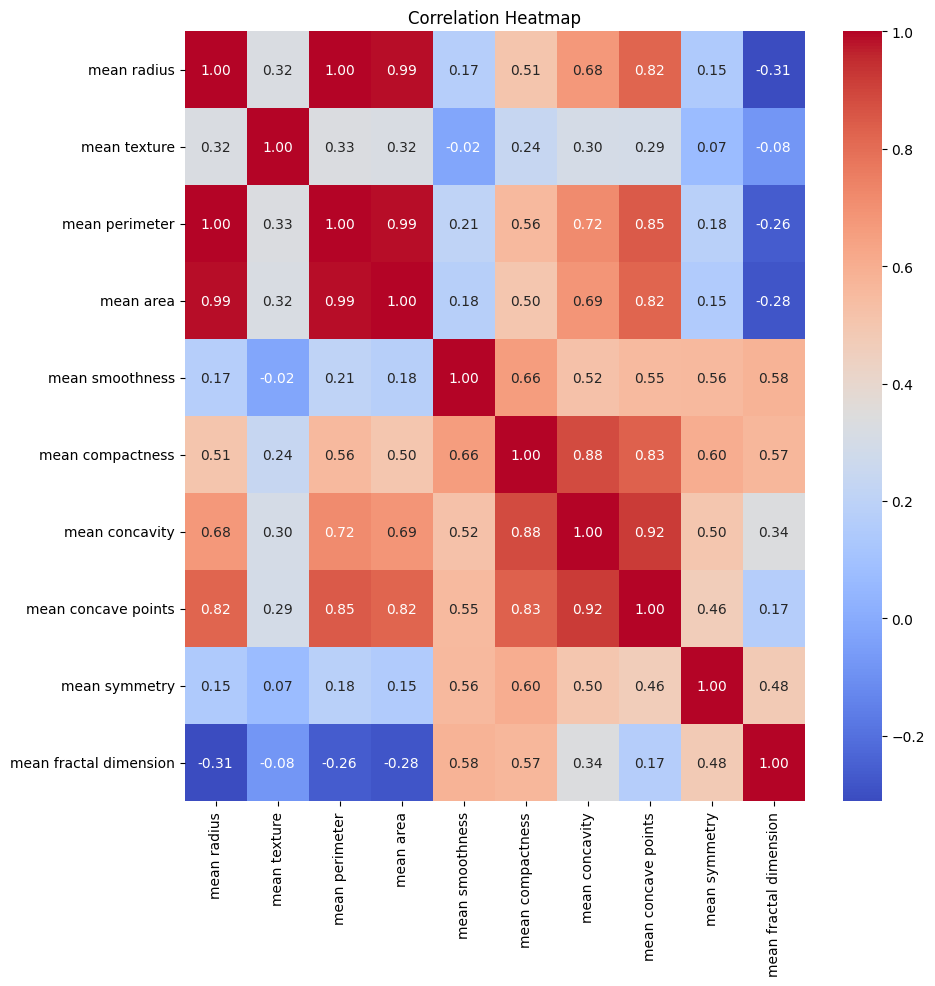

In [41]:
# heatmap to see correlation between numerical features (First 10 column)
plt.figure(figsize=(10,10))
sns.heatmap(df[data.feature_names[:10]].corr(), annot = True, cmap='coolwarm', fmt ='.2f')
plt.title('Correlation Heatmap')
plt.show()

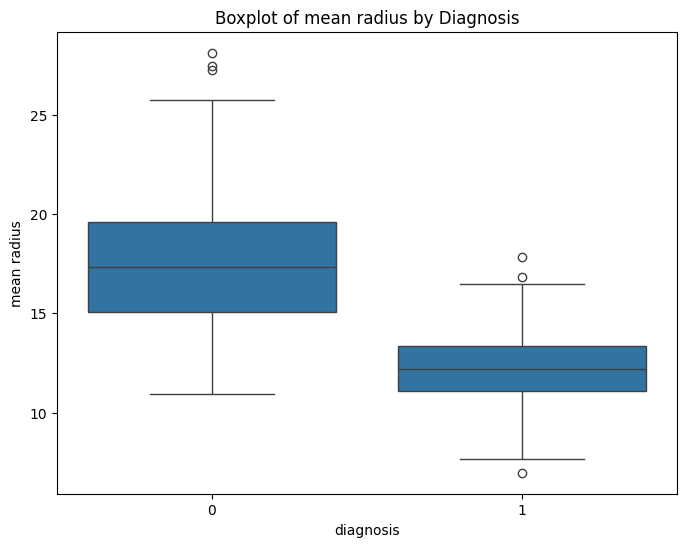

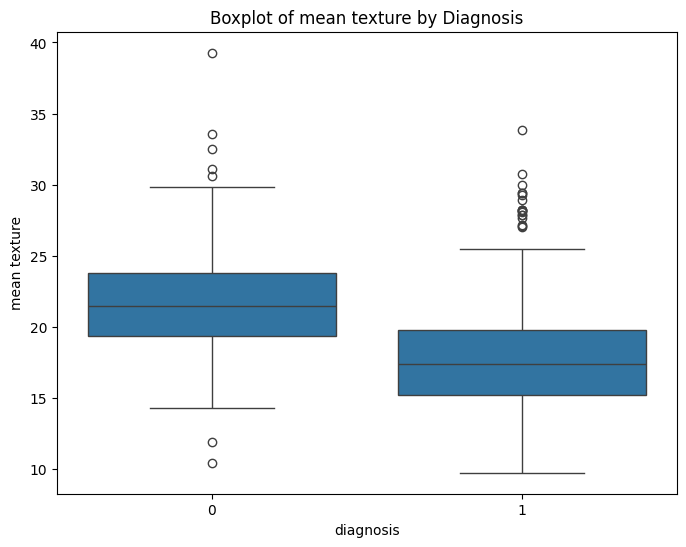

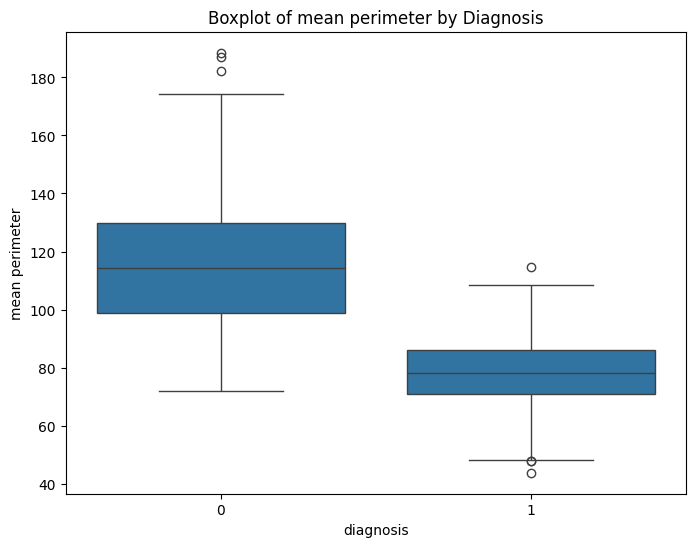

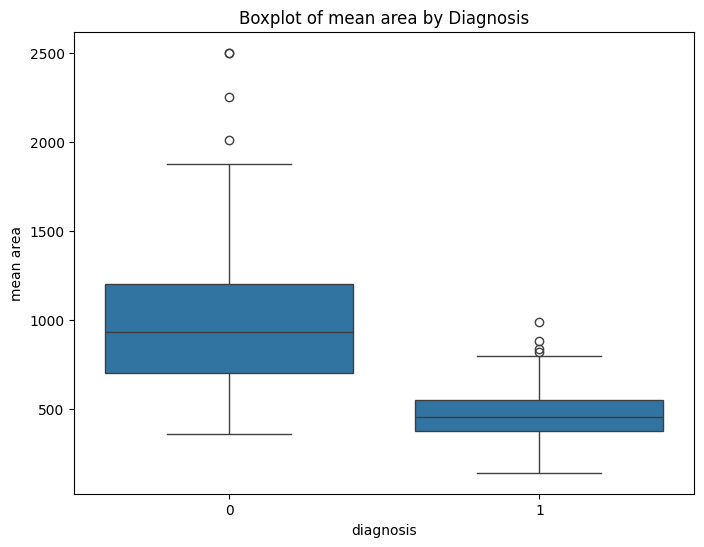

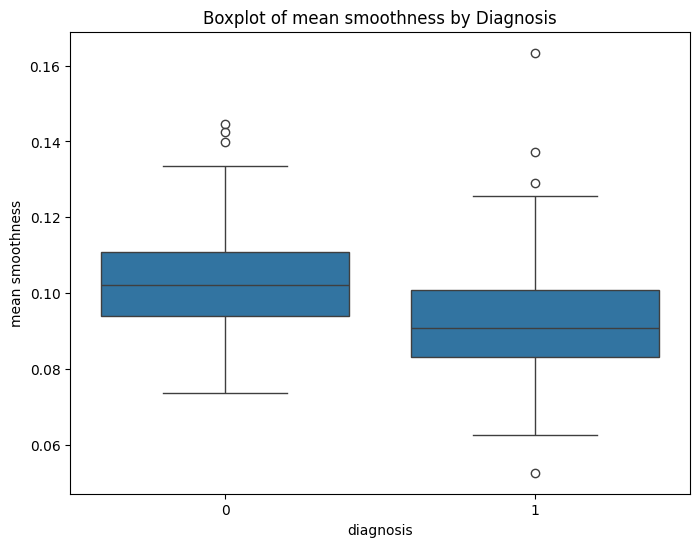

In [62]:
# Boxplot for some features
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

for f in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='diagnosis', y=f, data=df)
    plt.title(f"Boxplot of {f} by Diagnosis")
    plt.show()

### **Step 5: Split the dataset**

In [65]:
# Separate feature X and y
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [109]:
# Split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [110]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


### **Step 6: Preprocessing**

In [111]:
# Scale the features (standardization: mean=0, std=1)
scale = StandardScaler()
Xtrain_scale = scale.fit_transform(X_train)
Xtest_scale = scale.transform(X_test)
# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train class distribution:", y_train.value_counts())
print("y_test class distribution:", y_test.value_counts())

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train class distribution: diagnosis
1    286
0    169
Name: count, dtype: int64
y_test class distribution: diagnosis
1    71
0    43
Name: count, dtype: int64


### **Step 7: Model Building and Training**

In [121]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# # Regularization
# model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42)

# fit the model
model.fit(Xtrain_scale, y_train)

LogisticRegression(random_state=42)

In [122]:
# Make predictions
y_pred = model.predict(Xtest_scale)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [123]:
# Make predictions
y_train_pred = model.predict(Xtrain_scale)
y_train_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

### **Step 8: Evaluate the model**

In [124]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9868
Test Accuracy: 0.9737


In [126]:
cr_lr = classification_report(y_test, y_pred, target_names = ['Malignant (0)', 'Benign (1)'])
print("Classification Report of the LogisticRegression model:\n", cr_lr)

Classification Report of the LogisticRegression model:
                precision    recall  f1-score   support

Malignant (0)       0.98      0.95      0.96        43
   Benign (1)       0.97      0.99      0.98        71

     accuracy                           0.97       114
    macro avg       0.97      0.97      0.97       114
 weighted avg       0.97      0.97      0.97       114



In [127]:
cm_lr = confusion_matrix(y_test, y_pred)
print("confusion matrix of the LogisticRegression model:\n", cm_lr)

confusion matrix of the LogisticRegression model:
 [[41  2]
 [ 1 70]]


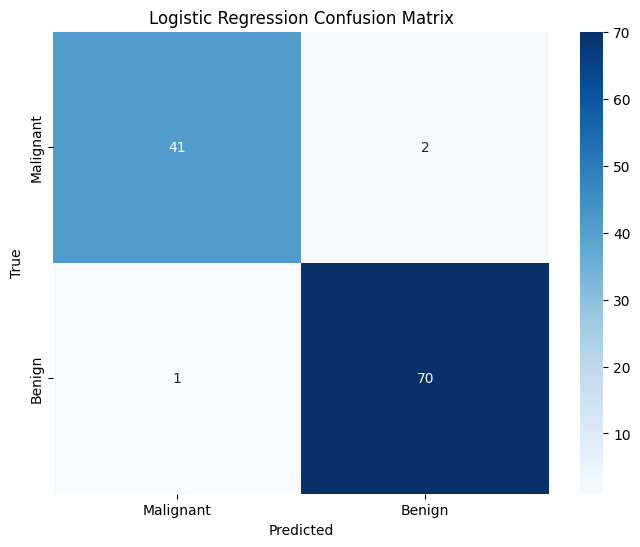

In [128]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## **Step 9: Hyperparameter Tuning**

In [130]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid.fit(Xtrain_scale, y_train)
print("Best params:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_best = best_model.predict(Xtest_scale)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))

Best params: {'C': 0.1, 'solver': 'liblinear'}
Tuned Accuracy: 0.9912280701754386


### **Step 10 : Advanced evaluation**

ROC-AUC Score: 0.998689813298395


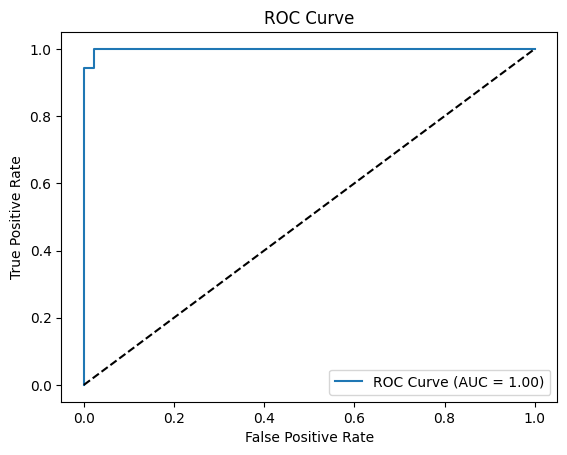

In [134]:
from sklearn.metrics import roc_auc_score, roc_curve
# ROC-AUC (good for imbalanced classes)
y_prob = best_model.predict_proba(Xtest_scale)[:, 1]  # Probabilities for positive class
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)  # Expect ~0.99+

# ROC Curve plot
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()